In [ ]:
# Build Image Classification Model Using CNN on Food Dataset

In [ ]:
# https://www.kaggle.com/datasets/ispritchin/food-4-pizza-risotto-steak-sushi?resource=download

In [ ]:
# Step 1: Loading and Preprocessing the Image Data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
train_dir = 'Dataset/food-4/train'
test_dir = 'Dataset/food-4/test'

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
# Step 2: Defining the Model’s Architecture

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 148, 148, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 74, 74, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 72, 72, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 36, 36, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 34, 34, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 17, 17, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 36992)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    4,735,104 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 4)             │          516 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 3: Training the Model

In [10]:
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)

C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3388 - loss: 1.3970 - val_accuracy: 0.5897 - val_loss: 1.0719
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3750 - loss: 1.2494 - val_accuracy: 0.2500 - val_loss: 1.3746
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


93/93 ━━━━━━━━━━━━━━━━━━━━ 90s 971ms/step - accuracy: 0.4856 - loss: 1.1813 - val_accuracy: 0.5161 - val_loss: 1.2037
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5625 - loss: 1.1421 - val_accuracy: 0.5000 - val_loss: 1.2293
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 75s 806ms/step - accuracy: 0.5471 - loss: 1.0923 - val_accuracy: 0.5433 - val_loss: 1.2492
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.3750 - loss: 1.2519 - val_accuracy: 0.2500 - val_loss: 1.3219
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 74s 798ms/step - accuracy: 0.5612 - loss: 1.0552 - val_accuracy: 0.6179 - val_loss: 0.9628
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.7500 - loss: 0.7569 - val_accuracy: 0.5000 - val_loss: 1.9252
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 75s 804ms/step - accuracy: 0.5909 - loss: 0.9991 - val_accuracy: 0.5575 - val_loss: 1.0910
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.6875 - loss: 0.8439 - val_accuracy: 0.8750 - v

In [ ]:
# Step 4: Estimating the Model’s Performance

In [11]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

32/32 - 7s - 211ms/step - accuracy: 0.5580 - loss: 1.1131

Test accuracy: 0.5580


In [12]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys())))

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step

Classification Report:
               precision    recall  f1-score   support

       pizza       0.23      0.33      0.27       250
     risotto       0.27      0.08      0.12       250
       steak       0.26      0.46      0.33       250
       sushi       0.22      0.10      0.14       250

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.22      1000
weighted avg       0.24      0.24      0.22      1000



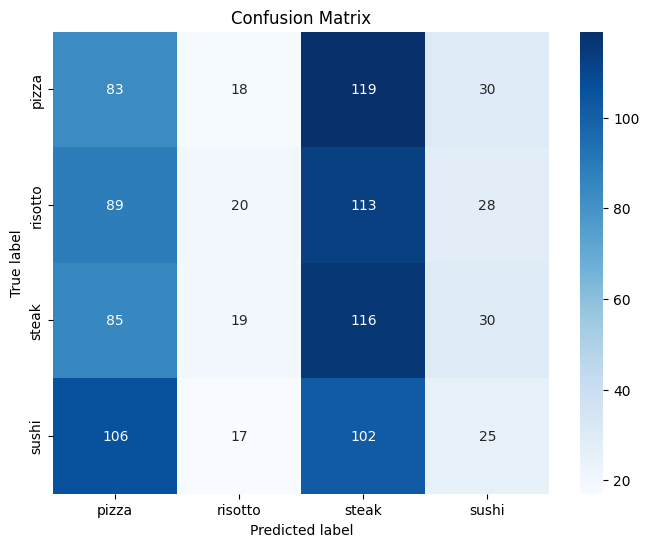

In [13]:
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 5: Visualization of Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


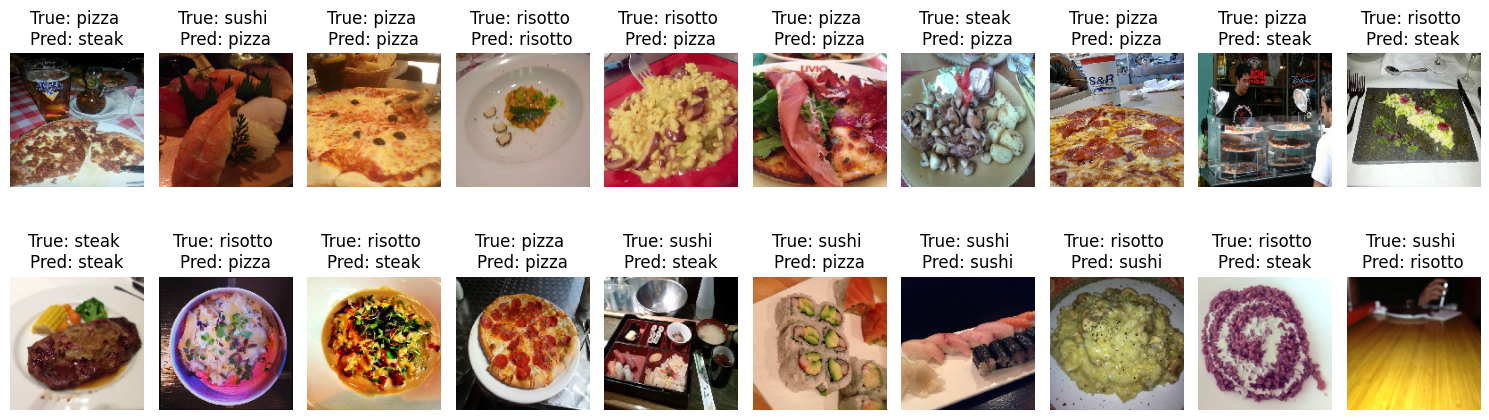

In [14]:
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(labels, axis=1)
    
    class_names = list(generator.class_indices.keys())

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_names[true_classes[i]]} \nPred: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)